In [1]:
import sys

sys.path.insert(0, '..')

import shutil
import uuid
from bio_check.worker.jobs import Supervisor, Worker
from bio_check.storage.database import MongoDbConnector
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import os 
from functools import partial
from bio_check import unique_id


_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)


def jobid(): return str(uuid.uuid4())


load_dotenv("../bio_check/.env")
uri = os.getenv("MONGO_DB_URI")
omex_source_dir = './model-examples/sbml-core'
omex_name = 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'
simulators = ['amici', 'copasi', 'tellurium']
spec_name = 'cI mRNA'
job_id = jobid()

db_connector = MongoDbConnector(connection_uri=uri, database_id="service_requests")

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Cannot register SimpleNeuron. Error:
**
No module named 'pyneuroml'
**


In [2]:
supervisor = Supervisor(db_connector=db_connector)

In [3]:
supervisor.pending_jobs

[{'_id': ObjectId('6679fb9ef0a7c3bb9d2ab155'),
  'status': 'PENDING',
  'job_id': '0fb705b6-4b63-4348-94aa-27d37ba9e60f',
  'omex_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'comparison_id': 'test',
  'timestamp': '2024-06-24 23:05:02.045342',
  'ground_truth_report_path': '../tmp/reports.h5',
  'include_outputs': True},
 {'_id': ObjectId('667a5c31bb9abc1957e2eb47'),
  'status': 'PENDING',
  'job_id': '370b3f4b-b7cb-405e-8c14-7db24ff2c386',
  'omex_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['tellurium'],
  'comparison_id': 'uniform-time-course-comparison-370b3f4b-b7cb-405e-8c14-7db24ff2c386',
  'timestamp': '2024-06-25 05:57:05.908015',
  'ground_truth_report_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
  'include_outputs': True}]

There are pending jobs.
In progress job does not yet exist for test
Successfully created new progress job for test
Completed job does not yet exist for test
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'Gibson-Bruck next reaction algorithm' (KISAO_0000027) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie

 succeeded

Bundling outputs ...
Cleaning up ...
LacI protein LacI protein
LacI protein LacI protein
LacI protein LacI protein
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
TetR protein TetR protein
TetR protein TetR protein
TetR protein TetR protein
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
cI protein cI protein
cI protein cI protein
cI protein cI protein
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
LacI mRNA LacI mRNA
LacI mRNA LacI mRNA
LacI mRNA LacI mRNA
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
 

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
TetR mRNA TetR mRNA
TetR mRNA TetR mRNA
TetR mRNA TetR mRNA
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
 

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
cI mRNA cI mRNA
cI mRNA cI mRNA
cI mRNA cI mRNA


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

Successfully created new completed job for test
Job queue length: 1
Sleeping for 3 seconds...
=>
==>
===>|



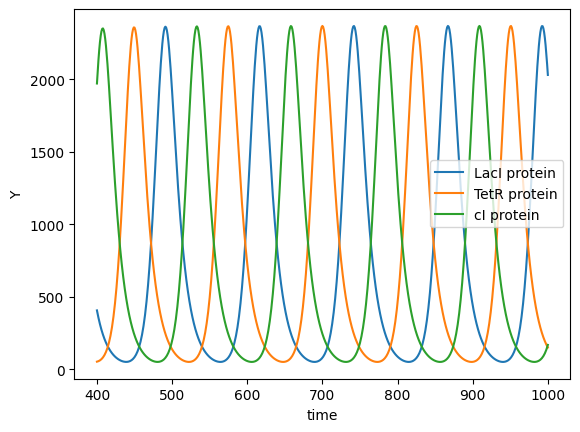

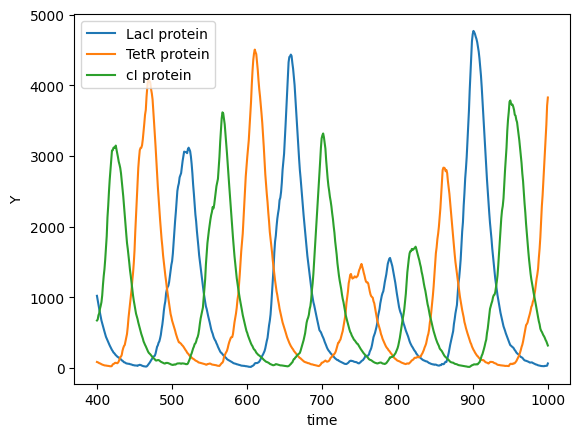

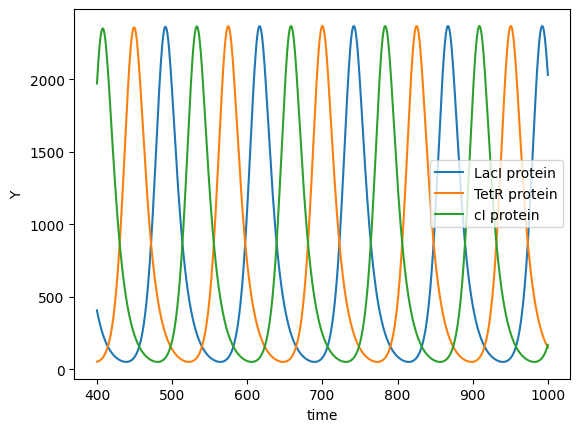

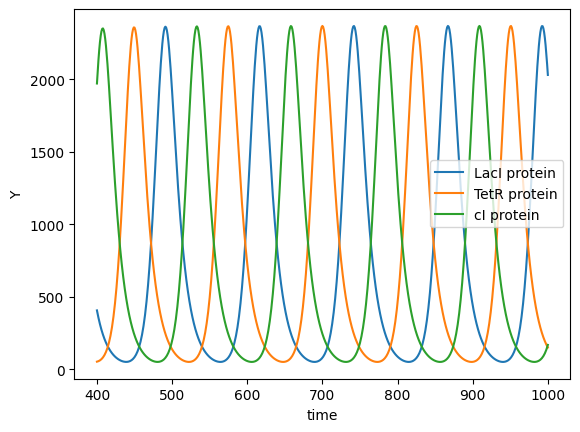

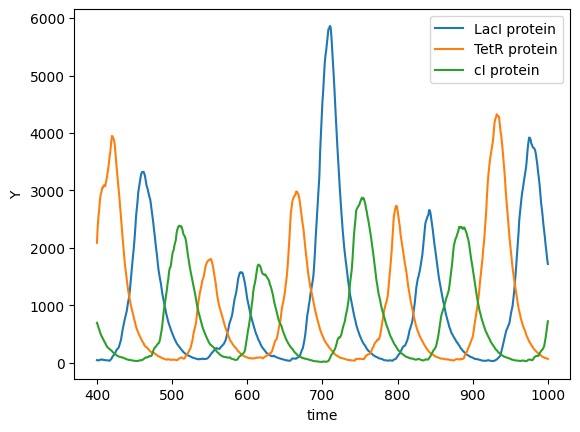

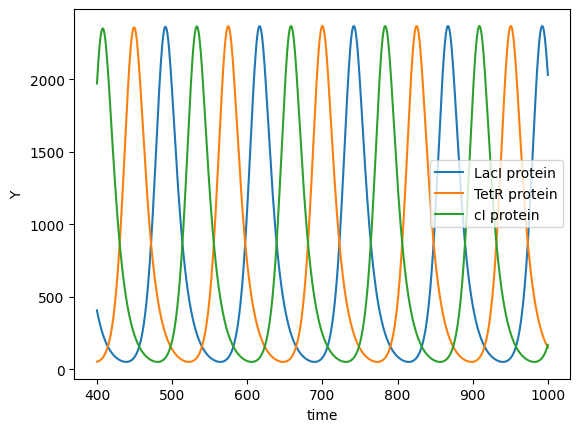

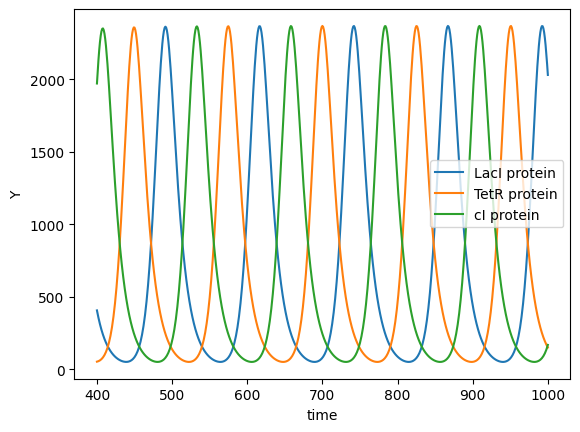

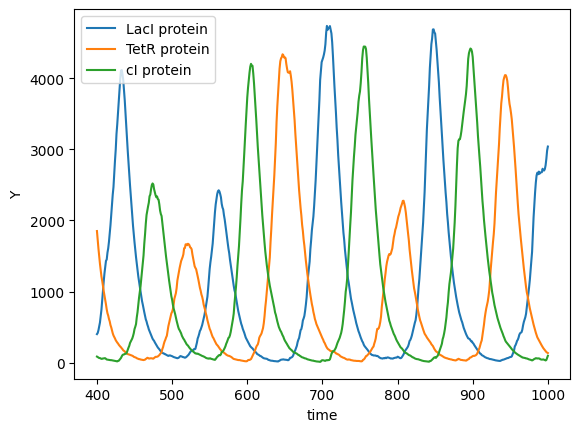

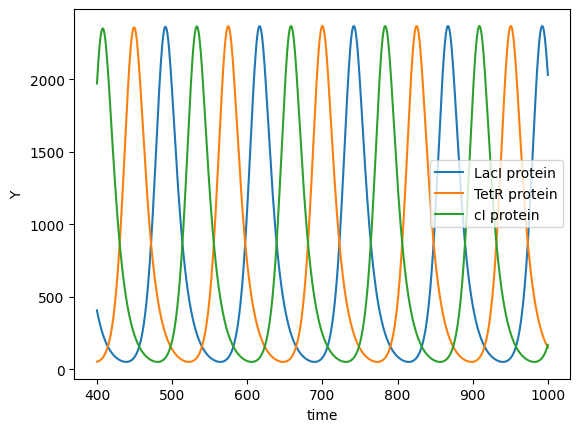

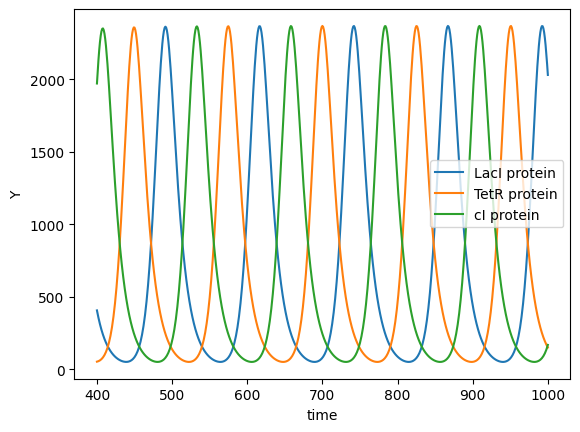

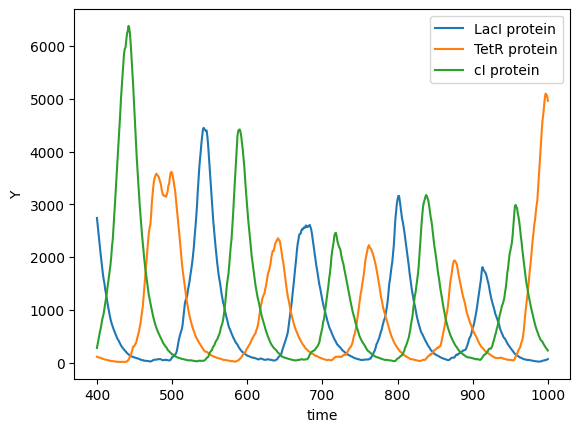

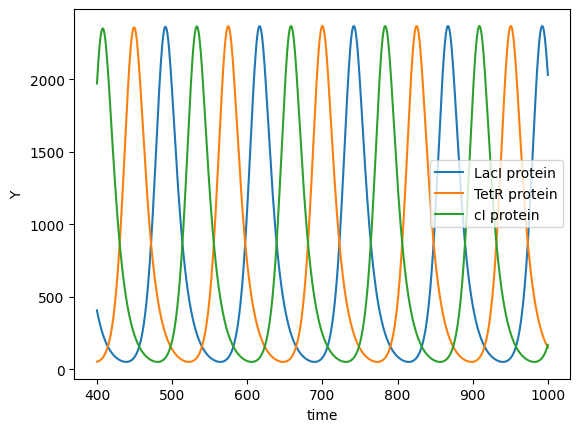

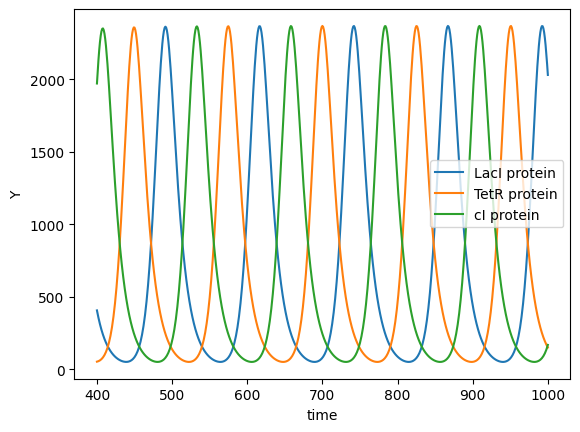

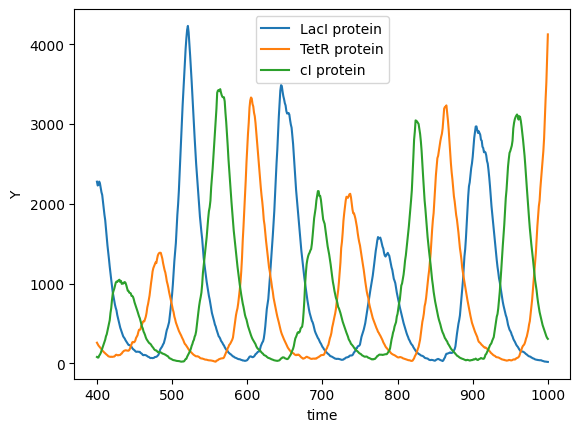

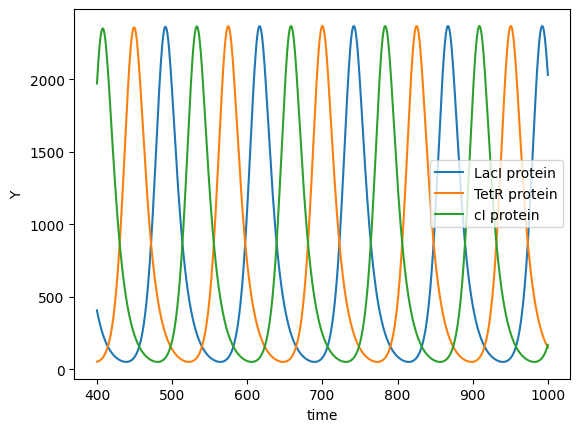

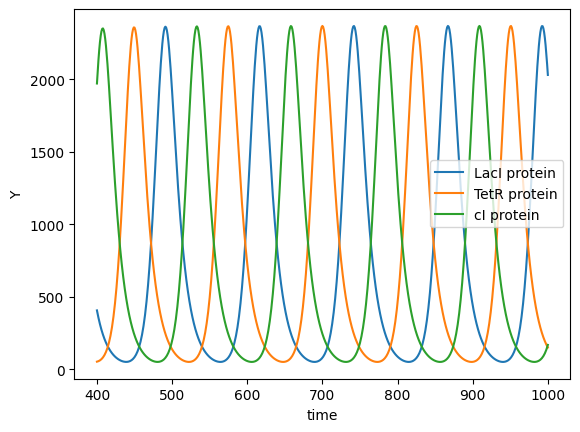

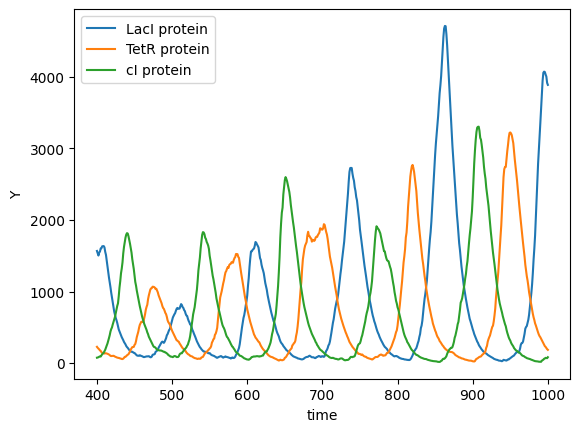

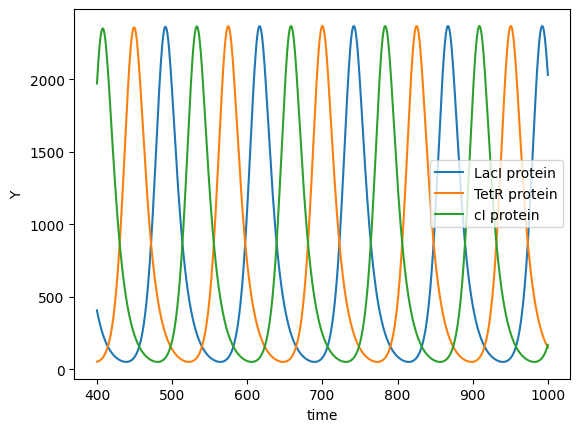

In [4]:
result = await supervisor.check_jobs(max_retries=5, delay=3)

In [5]:
supervisor.pending_jobs

[{'_id': ObjectId('6679fb9ef0a7c3bb9d2ab155'),
  'status': 'PENDING',
  'job_id': '0fb705b6-4b63-4348-94aa-27d37ba9e60f',
  'omex_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'comparison_id': 'test',
  'timestamp': '2024-06-24 23:05:02.045342',
  'ground_truth_report_path': '../tmp/reports.h5',
  'include_outputs': True},
 {'_id': ObjectId('667a5c31bb9abc1957e2eb47'),
  'status': 'PENDING',
  'job_id': '370b3f4b-b7cb-405e-8c14-7db24ff2c386',
  'omex_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['tellurium'],
  'comparison_id': 'uniform-time-course-comparison-370b3f4b-b7cb-405e-8c14-7db24ff2c386',
  'timestamp': '2024-06-25 05:57:05.908015',
  'ground_truth_report_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
  'include_outputs': True}]

In [6]:
supervisor.completed_jobs

[{'_id': ObjectId('667ab6b8e8f3913e9da0baee'),
  'job_id': '12f00bef-be24-4573-83e5-008e41bd0ffe',
  'status': 'COMPLETED',
  'timestamp': '2024-06-25 12:23:20.497764',
  'comparison_id': 'test',
  'results': {'results': [{'species_name': 'LacI protein',
     'mse': {'amici': {'amici': 0.0,
       'copasi': 3510147.4039618876,
       'tellurium': 0.0005853579775907033,
       'ground_truth': 5.813762263332336e-05},
      'copasi': {'amici': 3510147.4039618876,
       'copasi': 0.0,
       'tellurium': 3510156.2165731876,
       'ground_truth': 3510143.597773537},
      'tellurium': {'amici': 0.0005853579775907033,
       'copasi': 3510156.2165731876,
       'tellurium': 0.0,
       'ground_truth': 0.0009980000242460073},
      'ground_truth': {'amici': 5.813762263332336e-05,
       'copasi': 3510143.597773537,
       'tellurium': 0.0009980000242460073,
       'ground_truth': 0.0}},
     'proximity': {'amici': {'amici': True,
       'copasi': False,
       'tellurium': True,
       'gro

In [7]:
supervisor._refresh_jobs()

supervisor.jobs

{'completed_jobs': [{'_id': ObjectId('667ab0076a13f1b4af0c8c3e'),
   'job_id': 'c5e94d79-9002-4899-b5be-4dd6d282fb51',
   'status': 'COMPLETED',
   'timestamp': '2024-06-25 11:54:47.318719',
   'comparison_id': 'test',
   'results': {'results': [{'species_name': 'LacI protein',
      'mse': {'amici': {'amici': 0.0,
        'copasi': 3016294.0690745525,
        'tellurium': 0.0005853579775907033,
        'ground_truth': 5.813762263332336e-05},
       'copasi': {'amici': 3016294.0690745525,
        'copasi': 0.0,
        'tellurium': 3016310.27742731,
        'ground_truth': 3016287.998389725},
       'tellurium': {'amici': 0.0005853579775907033,
        'copasi': 3016310.27742731,
        'tellurium': 0.0,
        'ground_truth': 0.0009980000242460073},
       'ground_truth': {'amici': 5.813762263332336e-05,
        'copasi': 3016287.998389725,
        'tellurium': 0.0009980000242460073,
        'ground_truth': 0.0}},
      'proximity': {'amici': {'amici': True,
        'copasi': False,

### Step-by-step Worker

In [ ]:
# 1. get an unassigned pending job by id
job_id = supervisor.jobs['pending_jobs'].pop(0)

In [ ]:
# 2. fetch the respective document/job
job_doc = supervisor.db_connector.db.pending_jobs.find_one({'job_id': job_id})

In [ ]:
job_doc

In [ ]:
job_params = job_doc.copy()

In [ ]:
import os 
from bio_check import unique_id

os.path.exists(job_params['omex_path'])

In [ ]:
# 3. Create a new in process job for the pending job we just picked up
worker_id = unique_id()
in_progress_job_id = unique_id()
in_progress_doc = supervisor.db_connector.insert_in_progress_job(
    job_id=in_progress_job_id,
    worker_id=worker_id,
    comparison_id=job_doc['comparison_id'],
)

in_progress_doc

In [ ]:
# 4. Call the worker who will automatically process the job
worker = Worker(job_params=job_params)

In [ ]:
# 4. Get the result from the worker and insert the new completed job for that comparison_id
from bio_check import unique_id

comparison_id = job_doc['comparison_id']

completed_doc = supervisor.db_connector.insert_completed_job(
    job_id=unique_id(),
    comparison_id=comparison_id,
    results=worker.job_result
)

In [ ]:
completed_doc